In [1]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [2]:
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
image_file = get_pkg_data_filename(r"/home/ambica/Desktop/Project/img3.fits")
f= fits.open(image_file)

In [3]:
fits.info(image_file)

Filename: /home/ambica/Desktop/Project/img3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    4325   (30720, 12800)   float32   


In [4]:
image_data=fits.getdata(image_file,ext=0)

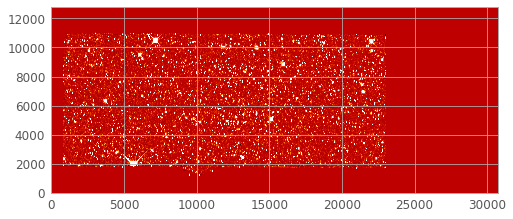

In [5]:
from astropy.visualization import ZScaleInterval
z=ZScaleInterval()
z1,z2=z.get_limits(image_data)
plt.figure()
plt.imshow(image_data,vmin=z1,vmax=z2, origin = 'lower')

In [6]:
from astropy.io import fits
hdulist = fits.open(r"/home/ambica/Desktop/Project/img3.fits")
header = hdulist[0].header
#print(header.cards)

In [18]:
#from astropy import wcs
#w=WCS('img3.fits')
#x, y = w.wcs_world2pix(34.3651,-5.12197,0)
#print(x,y)


14458.64325671967 11081.22311981292


In [7]:
#from astropy.nddata import Cutout2D
#from astropy import units as u
#position = (14458.64325671967, 11081.22311981292)
#size = (20,20)
#cutout = Cutout2D(image_data,position,size)
#z1,z2=z.get_limits(cutout.data)
#plt.figure()
#plt.imshow(cutout.data, vmin = z1, vmax=z2, origin ='lower')


In [8]:
#from astropy.coordinates import SkyCoord
#from astropy.wcs import WCS
#from astropy.nddata import Cutout2D
#from astropy import units as u
#import numpy as np
#position = SkyCoord(34.3651,-5.12197, unit = "deg")
#wcs = WCS(naxis=2)
#wcs.wcs.crval=[position.ra.to_value(u.deg),position.dec.to_value(u.deg)]
#cutout = Cutout2D(image_data,position,(20,20),wcs=wcs)
#plt.imshow(cutout.data, origin = 'lower')
#print(position)

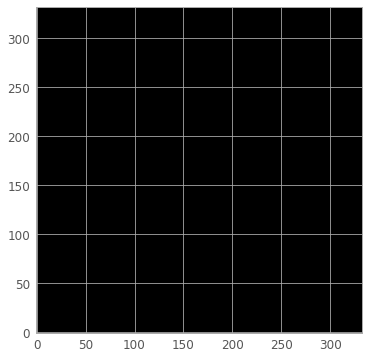

In [30]:
from astropy.nddata import Cutout2D
from astropy import units as u
zoomSize= u.Quantity((20,20), u.arcsec)
from astropy import wcs
from astropy.io import fits
hdulist=fits.open(r"/home/ambica/Desktop/Project/img3.fits")
w=wcs.WCS(hdulist[0].header)
from astropy.coordinates import SkyCoord
position = SkyCoord(34.3651,-5.12197, unit="deg")
cutout = Cutout2D(image_data, position, zoomSize, wcs=w)
xdu = fits.PrimaryHDU(cutout.data)
xdu.header = hdulist[0].header
xdu.header.update(cutout.wcs.to_header())
outputim = get_pkg_data_filename(r"/home/ambica/Downloads/out.fits")
img = fits.open("/home/ambica/Downloads/out.fits")
xdu.writeto(outputim, overwrite= True)
outputim = get_pkg_data_filename(r"/home/ambica/Downloads/out.fits")
outputimdata=fits.getdata(outputim,ext=0)
#plt.imshow(outputimdata, origin='lower')
#xdu.writeto(r"/home/ambica/Downloads/out.fits", overwrite= True)
#plt.imshow(r"/home/ambica/Downloads/out.fits",origin = 'lower')
z=ZScaleInterval()
z1,z2=z.get_limits(outputimdata)
plt.figure()
plt.imshow(outputimdata,vmin=z1,vmax=z2, origin = 'lower')